QUESTION 1:
Train a single perceptron and SVM to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision boundary for each updation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AND Gate as a DateFrame

In [ ]:
d = {'X1':[0, 0, 1, 1], 'X2':[0, 1, 0, 1], 'Output':[0, 0, 0, 1]}
df = pd.DataFrame(data = d)
df

,X1,X2,Output
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X = df.drop('Output', axis = 1).to_numpy()
y = np.array(df['Output'])

This is using inbuilt functions

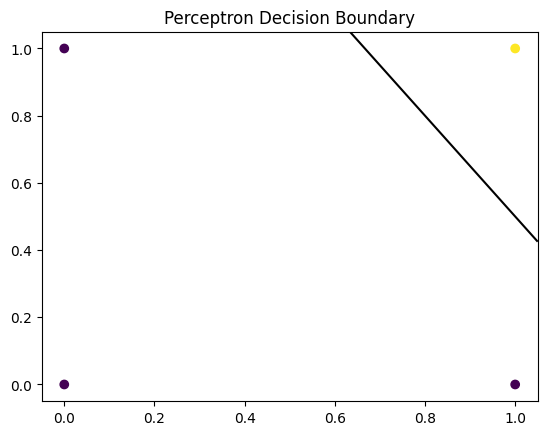

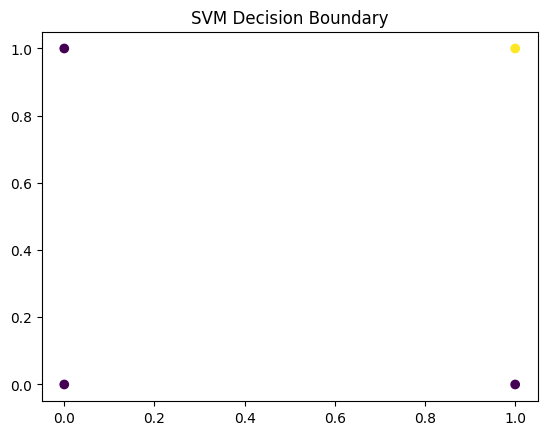

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

# Train a Perceptron
perceptron = Perceptron(max_iter=100, tol=None)
perceptron.fit(X, y)

# Train an SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot the decision boundary for the Perceptron
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.title('Perceptron Decision Boundary')
plt.show()

# Plot the decision boundary for the SVM
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.title('SVM Decision Boundary')
plt.show()

Perceptron without inbuilt

In [ ]:
# Training data
X = df.drop('Output', axis = 1).to_numpy()
y = np.array(df['Output'])

# Initialize weights, bias and learning rate
w = np.array([0.0, 0.0])
bias = 0.0
alpha = 0.1

# Define the perceptron function
def perceptron(x):
    return np.dot(x, w) + bias

# Training loop
for epoch in range(100):
    misclassified = 0
    for i in range(len(X)):
        prediction = perceptron(X[i])
        error = y[i] - prediction
        if error != 0:
            misclassified += 1
            w += alpha * error * X[i]
            bias += alpha * error

        # Plot decision boundary
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=y)
        x_boundary = np.linspace(-0.2, 1.2, 100)
        y_boundary = (-w[0] * x_boundary - bias) / w[1]
        plt.plot(x_boundary, y_boundary, 'r')
        plt.title(f'Epoch {epoch + 1}, Misclassified: {misclassified}')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)
        plt.show(block=False)
        plt.pause(0.1)
        plt.close()

    if misclassified == 0:
        break

plt.show()

SVM without inbuilt

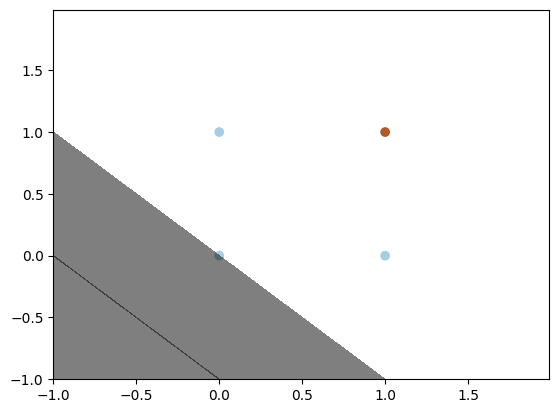

In [ ]:
# Initialize weights and bias
w = np.zeros(2)
b = 0

# Learning rate
learning_rate = 1

# Training
epochs = 100  # Number of training iterations

for _ in range(epochs):
    for i in range(len(X)):
        # Check if the point is misclassified
        if y[i] * (np.dot(X[i], w) - b) <= 0:
            # Update the weights and bias
            w = w + learning_rate * y[i] * X[i]
            b = b - learning_rate * y[i]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) - b
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()